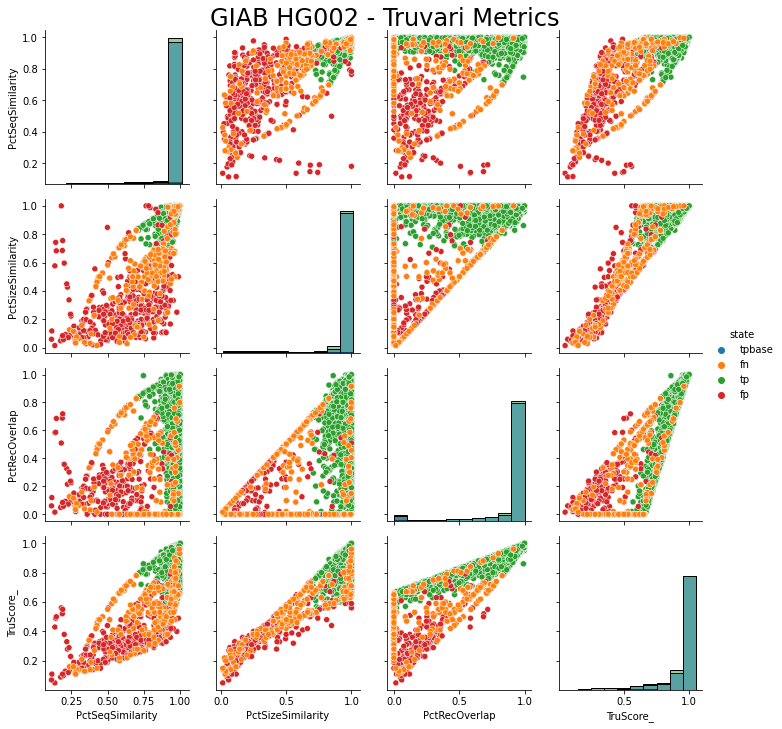

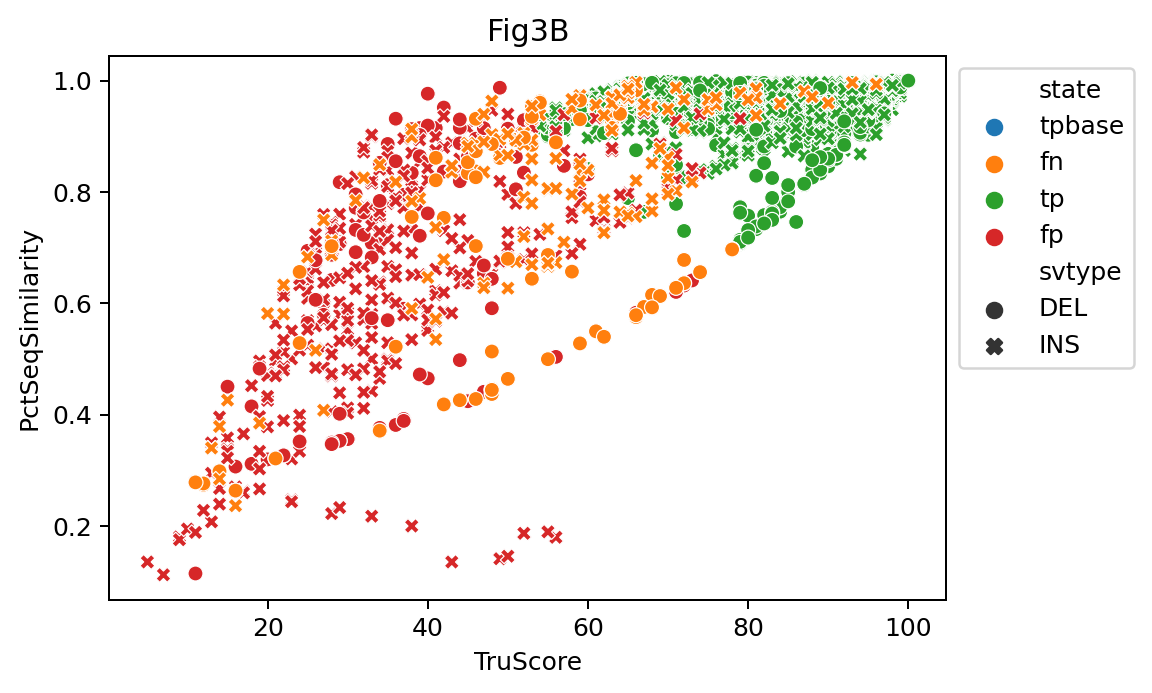

In [3]:
import joblib
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

v310_data = joblib.load("../stats/HG002_giab_strict.jl")

# We'll put TruScore on a 0 to 1 Scale so that our diagonal histogram have comparable bins
v310_data["TruScore_"] = v310_data["TruScore"] / 100

# These metrics we wish to plot
metrics = ["PctSeqSimilarity", "PctSizeSimilarity", "PctRecOverlap", "TruScore_"]

# Make plot
g = sb.PairGrid(data=v310_data.reset_index(), vars=metrics, hue="state")
g.map_diag(sb.histplot, binwidth=0.1)
g.map_offdiag(sb.scatterplot)
g.add_legend()
plt.suptitle('GIAB HG002 - Truvari Metrics',  y=1.01, 
             size = 24);
plt.show()

plt.figure(dpi=180)
p = sb.scatterplot(data=v310_data.reset_index(), 
                   x="TruScore", 
                   y="PctSeqSimilarity", 
                   hue="state", 
                   style="svtype", 
                   style_order=["DEL", "INS"])
p.set(title="Fig3B")
sb.move_legend(p, "upper left", bbox_to_anchor=(1, 1))


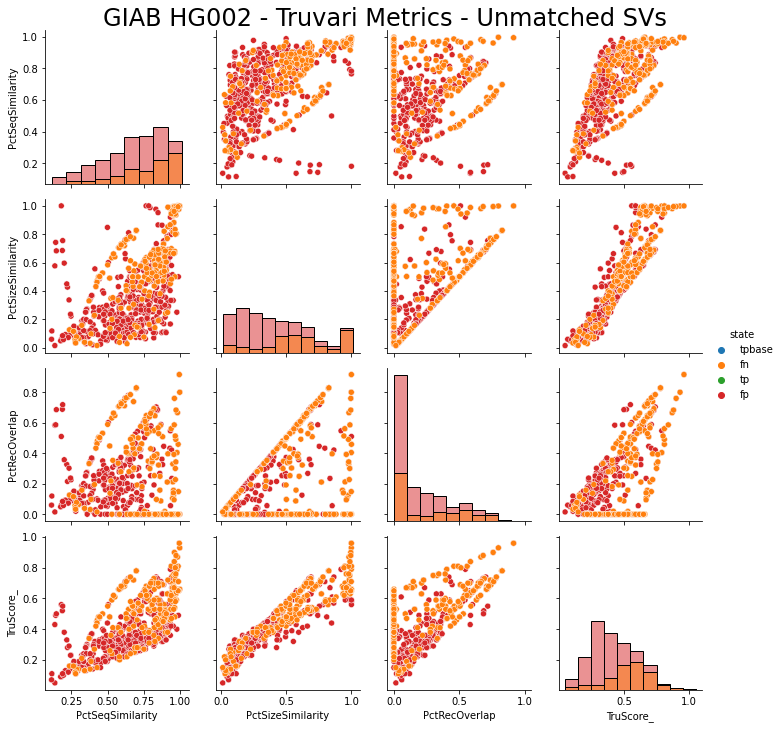

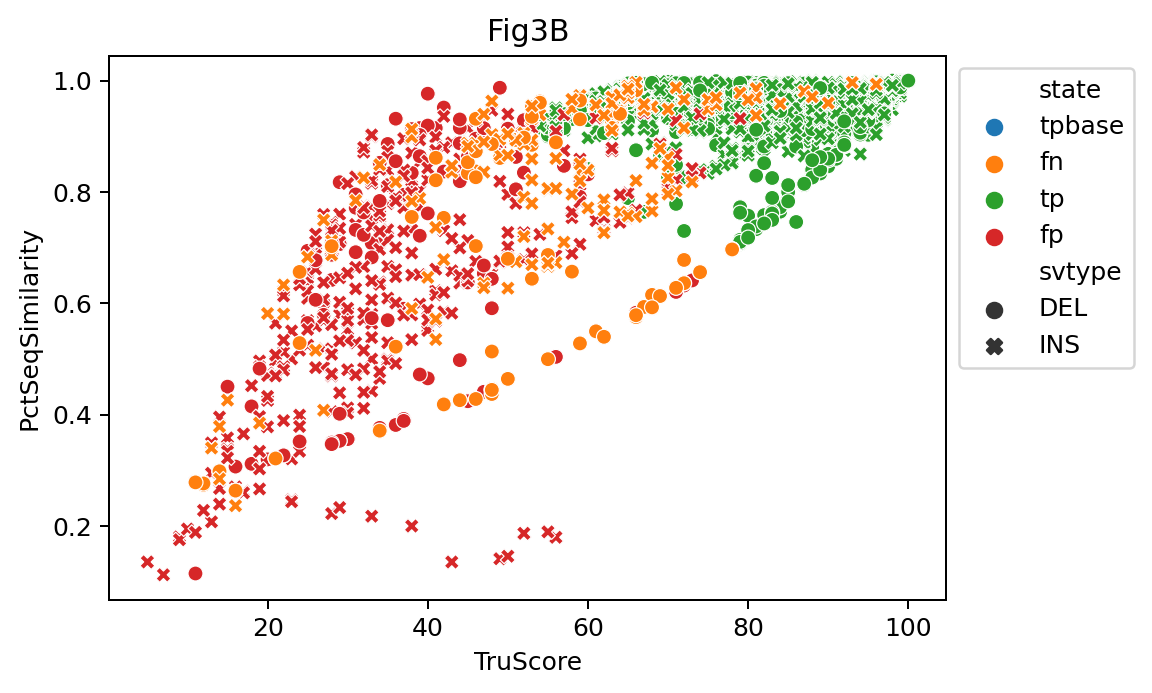

In [10]:
import joblib
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

v310_data = joblib.load("../stats/HG002_giab_strict.jl")

# We'll put TruScore on a 0 to 1 Scale so that our diagonal histogram have comparable bins
v310_data["TruScore_"] = v310_data["TruScore"] / 100

# These metrics we wish to plot
metrics = ["PctSeqSimilarity", "PctSizeSimilarity", "PctRecOverlap", "TruScore_"]

# Make plot
g = sb.PairGrid(data=v310_data[v310_data["state"].isin(['fn', 'fp'])].reset_index(), 
                               vars=metrics, hue="state")
g.map_diag(sb.histplot, binwidth=0.1)
g.map_offdiag(sb.scatterplot)
g.add_legend()
plt.suptitle('GIAB HG002 - Truvari Metrics - Unmatched SVs',  y=1.01, 
             size = 24);
plt.show()

plt.figure(dpi=180)
p = sb.scatterplot(data=v310_data.reset_index(), 
                   x="TruScore", 
                   y="PctSeqSimilarity", 
                   hue="state", 
                   style="svtype", 
                   style_order=["DEL", "INS"])
p.set(title="Fig3B")
sb.move_legend(p, "upper left", bbox_to_anchor=(1, 1))


In [12]:
data = v310_data
print(len(data[data["state"] == 'fn']))
print(len(data[(data["state"] == 'fn') & (data["TruScore"].isna())]))

606
391


In [14]:
391 / data["state"].value_counts().loc['tpbase']

0.04327614831211953

In [15]:
print(len(data[data["state"] == 'fp']))
print(len(data[(data["state"] == 'fp') & (data["TruScore"].isna())]))

897
292


In [16]:
292 / data["state"].value_counts().loc['tp']

0.031080361894624802